In [ ]:
print("colab is ready for de-reverberation hacks!")

colab is ready for de-reverberation hacks!


In [ ]:
print("colab is working! i'm ready for udio magic")

colab is working! i'm ready for udio magic


In [ ]:
!pip install librosa matplotlib soundfile - -quiet


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
!pip install librosa matplotlib sounfile --quiet

ERROR: Could not find a version that satisfies the requirement sounfile (from versions: none)
ERROR: No matching distribution found for sounfile


In [ ]:
!pip install librosa matplotlib soundfile --quiet

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from IPython.display import Audio

In [ ]:
from google.colab import files uploaded = files.upload()

SyntaxError: invalid syntax (<ipython-input-7-2019374750>, line 1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac to WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac


In [ ]:
file_name = list(uploaded.keys())[0]  # Automatically get uploaded file
y, sr = librosa.load(file_name, sr=None)  # sr = sample rate

# Play audio
Audio(y, rate=sr)

<ipython-input-9-3934879422>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_name, sr=None)  # sr = sample rate
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


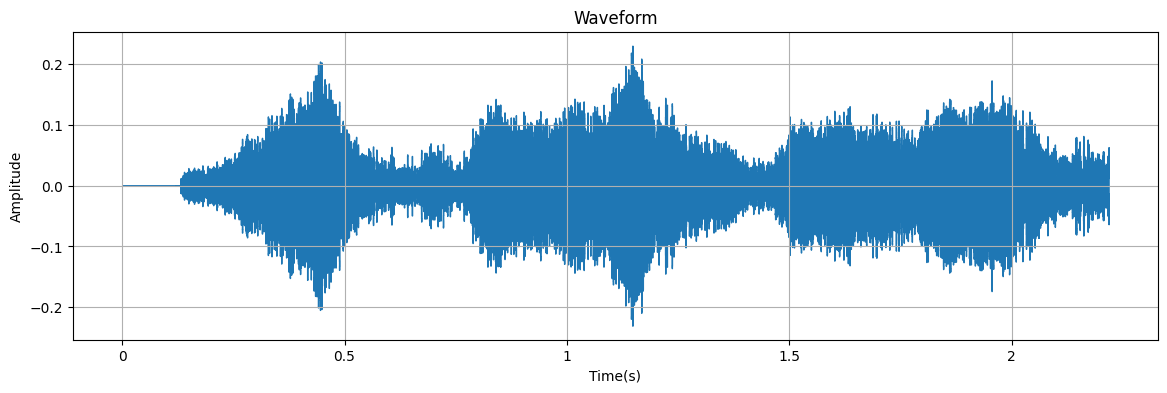

In [ ]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y,sr=sr)
plt.title('Waveform')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

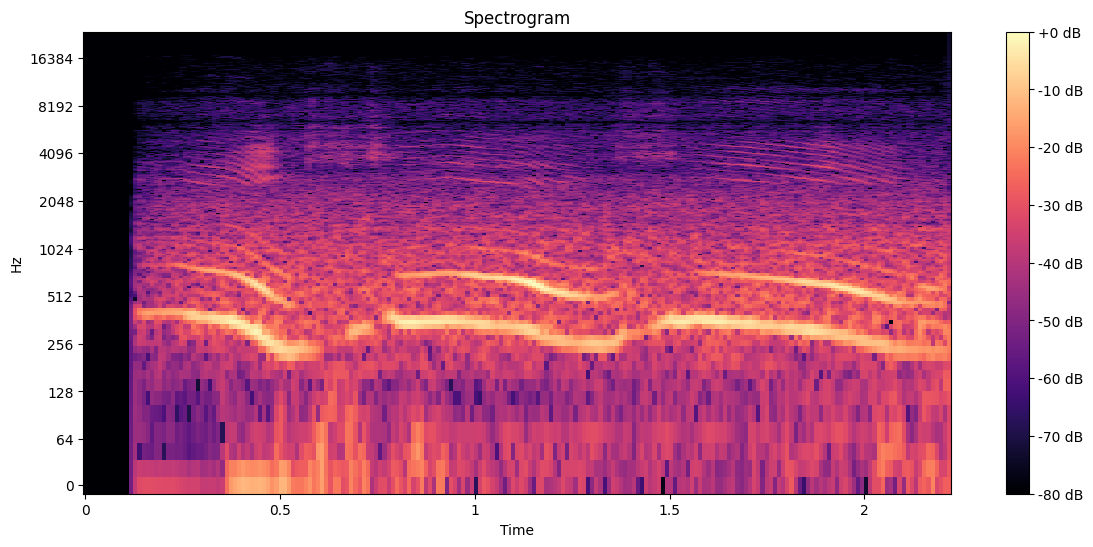

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

<ipython-input-13-4168858446>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac")  # Replace with actual path


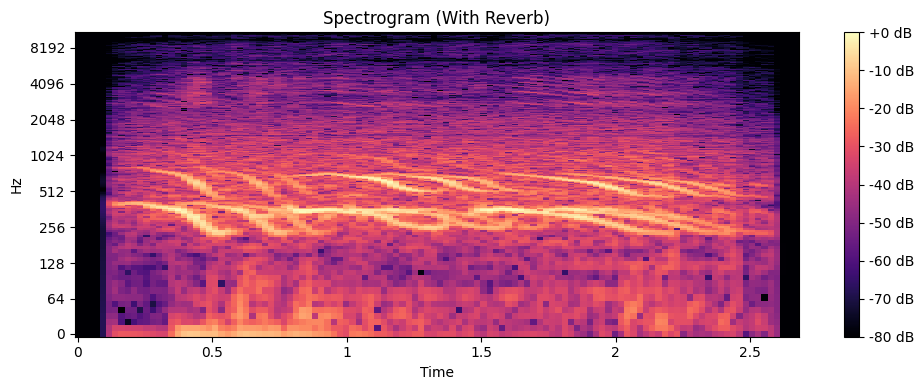

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# Load original voice (already done)
y, sr = librosa.load("WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac")  # Replace with actual path

# Create a simple impulse response for reverb
impulse = np.zeros(10000)
impulse[0] = 1.0
impulse[5000] = 0.6  # echo after 5000 samples
impulse[8000] = 0.3  # softer second echo

# Apply reverb (convolution)
reverb_audio = fftconvolve(y, impulse, mode='full')

# Normalize
reverb_audio = reverb_audio / np.max(np.abs(reverb_audio))

# Plot spectrogram of reverb_audio
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(reverb_audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (With Reverb)')
plt.tight_layout()
plt.show()


<ipython-input-14-3884308938>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac")  # Replace with actual file
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


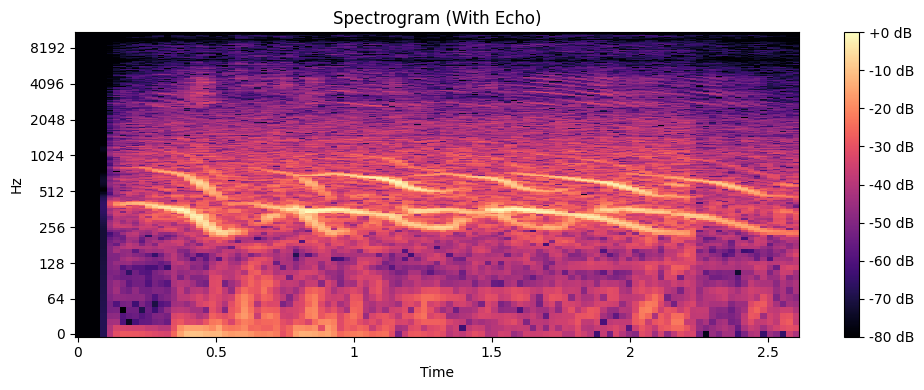

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

# Load your original audio
y, sr = librosa.load("WhatsApp Audio 2025-06-13 at 12.14.47 PM.aac")  # Replace with actual file

# Echo parameters
delay_time = 0.4  # seconds
decay = 0.5       # echo loudness

# Create the echo signal
delay_samples = int(delay_time * sr)
echo = np.zeros(len(y) + delay_samples)
echo[:len(y)] = y
echo[delay_samples:] += decay * y

# Save the echo-added audio
sf.write("audio_with_echo.wav", echo, sr)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(echo)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram (With Echo)')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()